In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [6]:
# 创建一个　时间序列数据
# 要求 :
# start index : 2016-01-01
# start index : 2016-12-31    
t_range = pd.date_range('2016-01-01','2016-12-31')

In [7]:
t_range

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10',
               ...
               '2016-12-22', '2016-12-23', '2016-12-24', '2016-12-25',
               '2016-12-26', '2016-12-27', '2016-12-28', '2016-12-29',
               '2016-12-30', '2016-12-31'],
              dtype='datetime64[ns]', length=366, freq='D')

In [10]:
s1 = Series(np.random.randn(len(t_range)),index=t_range)
s1

2016-01-01   -0.153437
2016-01-02   -1.087812
2016-01-03    0.414696
2016-01-04    0.641462
2016-01-05   -0.108995
                ...   
2016-12-27   -0.601355
2016-12-28    0.780318
2016-12-29    0.780693
2016-12-30    2.181757
2016-12-31   -0.954049
Freq: D, Length: 366, dtype: float64

In [11]:
s1['2016-01']

2016-01-01   -0.153437
2016-01-02   -1.087812
2016-01-03    0.414696
2016-01-04    0.641462
2016-01-05   -0.108995
2016-01-06    1.475219
2016-01-07   -1.103138
2016-01-08   -0.355040
2016-01-09    3.361836
2016-01-10    1.493392
2016-01-11   -1.475526
2016-01-12    0.737993
2016-01-13    0.516565
2016-01-14   -1.010829
2016-01-15    0.628978
2016-01-16    0.693188
2016-01-17   -0.545310
2016-01-18    2.413879
2016-01-19    0.517600
2016-01-20   -0.532996
2016-01-21    0.453755
2016-01-22   -1.002678
2016-01-23    2.322029
2016-01-24    0.158268
2016-01-25    0.014613
2016-01-26   -0.094149
2016-01-27    0.170013
2016-01-28   -2.437644
2016-01-29   -0.758649
2016-01-30   -1.991682
2016-01-31   -0.174299
Freq: D, dtype: float64

# mean() : 计算平均值

In [12]:
s1['2016-01'].mean()

0.10262265268362743

# resample(): 采样

- 参数：

    - M ： 月；
    - D ： 天；
    - H ： 小时；
    

In [15]:
# 按月采样，求平均值
s1_month = s1.resample('M').mean()
s1_month

2016-01-31    0.102623
2016-02-29   -0.334693
2016-03-31   -0.129293
2016-04-30   -0.096458
2016-05-31    0.181849
2016-06-30    0.091861
2016-07-31   -0.009605
2016-08-31   -0.109454
2016-09-30   -0.199642
2016-10-31   -0.398301
2016-11-30    0.034295
2016-12-31   -0.049395
Freq: M, dtype: float64

In [16]:
s1

2016-01-01   -0.153437
2016-01-02   -1.087812
2016-01-03    0.414696
2016-01-04    0.641462
2016-01-05   -0.108995
                ...   
2016-12-27   -0.601355
2016-12-28    0.780318
2016-12-29    0.780693
2016-12-30    2.181757
2016-12-31   -0.954049
Freq: D, Length: 366, dtype: float64

# ffill() 数据填充 ：

- 前面存在数据填充后面不存在的数据,直到遇到另一个存在的数据为止


In [39]:
# 按小时采样
# 月份的数据存在，但小时的数据不存在
# 所以用 ffill () 填充数据，即 前面存在数据填充后面不存在的数据,直到遇到另一个存在的数据位置
s1.resample('H').mean().ffill()

2016-01-01 00:00:00   -0.153437
2016-01-01 01:00:00   -0.153437
2016-01-01 02:00:00   -0.153437
2016-01-01 03:00:00   -0.153437
2016-01-01 04:00:00   -0.153437
                         ...   
2016-12-30 20:00:00    2.181757
2016-12-30 21:00:00    2.181757
2016-12-30 22:00:00    2.181757
2016-12-30 23:00:00    2.181757
2016-12-31 00:00:00   -0.954049
Freq: H, Length: 8761, dtype: float64

# bfill() 数据填充 ：

- 后面存在数据向前填充不存在的数据,直到遇到前面的另一个存在的数据为止

In [40]:
# 按小时采样
# 月份的数据存在，但小时的数据不存在
# 所以用 ffill () 填充数据，即 前面存在数据填充后面不存在的数据,直到遇到另一个存在的数据位置
s1.resample('H').mean().bfill()

2016-01-01 00:00:00   -0.153437
2016-01-01 01:00:00   -1.087812
2016-01-01 02:00:00   -1.087812
2016-01-01 03:00:00   -1.087812
2016-01-01 04:00:00   -1.087812
                         ...   
2016-12-30 20:00:00   -0.954049
2016-12-30 21:00:00   -0.954049
2016-12-30 22:00:00   -0.954049
2016-12-30 23:00:00   -0.954049
2016-12-31 00:00:00   -0.954049
Freq: H, Length: 8761, dtype: float64

# 画图

In [43]:
t_range = pd.date_range('2016-01-01','2016-12-31',freq='H')
t_range

DatetimeIndex(['2016-01-01 00:00:00', '2016-01-01 01:00:00',
               '2016-01-01 02:00:00', '2016-01-01 03:00:00',
               '2016-01-01 04:00:00', '2016-01-01 05:00:00',
               '2016-01-01 06:00:00', '2016-01-01 07:00:00',
               '2016-01-01 08:00:00', '2016-01-01 09:00:00',
               ...
               '2016-12-30 15:00:00', '2016-12-30 16:00:00',
               '2016-12-30 17:00:00', '2016-12-30 18:00:00',
               '2016-12-30 19:00:00', '2016-12-30 20:00:00',
               '2016-12-30 21:00:00', '2016-12-30 22:00:00',
               '2016-12-30 23:00:00', '2016-12-31 00:00:00'],
              dtype='datetime64[ns]', length=8761, freq='H')

In [46]:
stock_df = DataFrame(index=t_range)
stock_df.head()

""
2016-01-01 00:00:00
2016-01-01 01:00:00
2016-01-01 02:00:00
2016-01-01 03:00:00
2016-01-01 04:00:00


In [57]:
stock_df['BABA']=np.random.randint(80,160,size=len(t_range))
stock_df.head()

,BABA,TENCENT
2016-01-01 00:00:00,158,49
2016-01-01 01:00:00,132,43
2016-01-01 02:00:00,121,33
2016-01-01 03:00:00,118,34
2016-01-01 04:00:00,120,41


In [56]:
stock_df['TENCENT']=np.random.randint(30,50,size=len(t_range))
stock_df.head()

,BABA,TENCENT
2016-01-01 00:00:00,94,49
2016-01-01 01:00:00,110,43
2016-01-01 02:00:00,111,33
2016-01-01 03:00:00,114,34
2016-01-01 04:00:00,80,41


# plot() : 画图

In [77]:
# 若 plot() 没有显示出来,则需要调用 matplotlib.pyplot 库中的 show 函数
import matplotlib.pyplot as plt
plt.show()

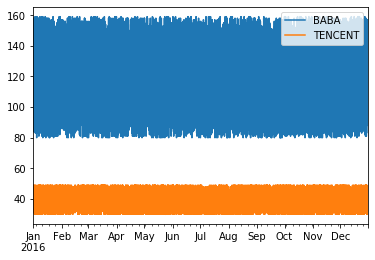

In [74]:
stock_df.plot()

In [75]:
weekly_df = DataFrame()

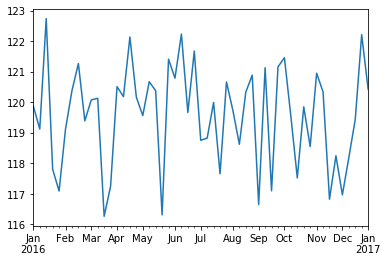

In [69]:
weekly_df['BABA'] =  stock_df['BABA'].resample('W').mean()
weekly_df['BABA'].plot()

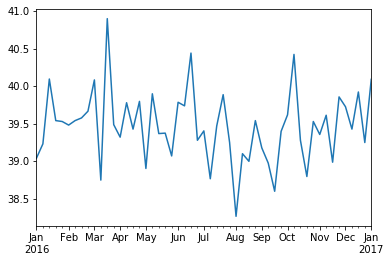

In [70]:
weekly_df['TENCENT'] =  stock_df['TENCENT'].resample('W').mean()
weekly_df['TENCENT'].plot()

In [71]:
weekly_df.head()

,BABA,TENCENT
2016-01-03,119.875000,39.041667
2016-01-10,119.125000,39.232143
2016-01-17,122.738095,40.095238
2016-01-24,117.809524,39.541667
2016-01-31,117.095238,39.529762


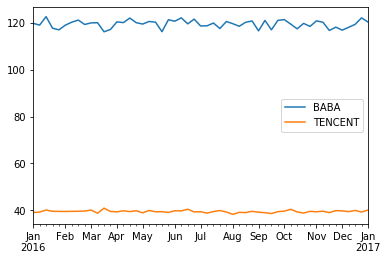

In [72]:
weekly_df.plot()